In [ ]:
#importing the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Data Exploration

Import Data

In [ ]:

test=pd.read_csv('/content/BTC-USD Out of Time Testing 1st Jan 2022 to 4th Feb 2022.csv')


In [ ]:
train=pd.read_csv('/content/BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv')


Data Exploration

In [ ]:
train.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [ ]:
train.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2188,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883
2189,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299
2190,2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000,47178.125000,26686491018
2191,2021-12-31,47169.371094,48472.527344,45819.953125,46306.445313,46306.445313,36974172400
2192,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [ ]:
train.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

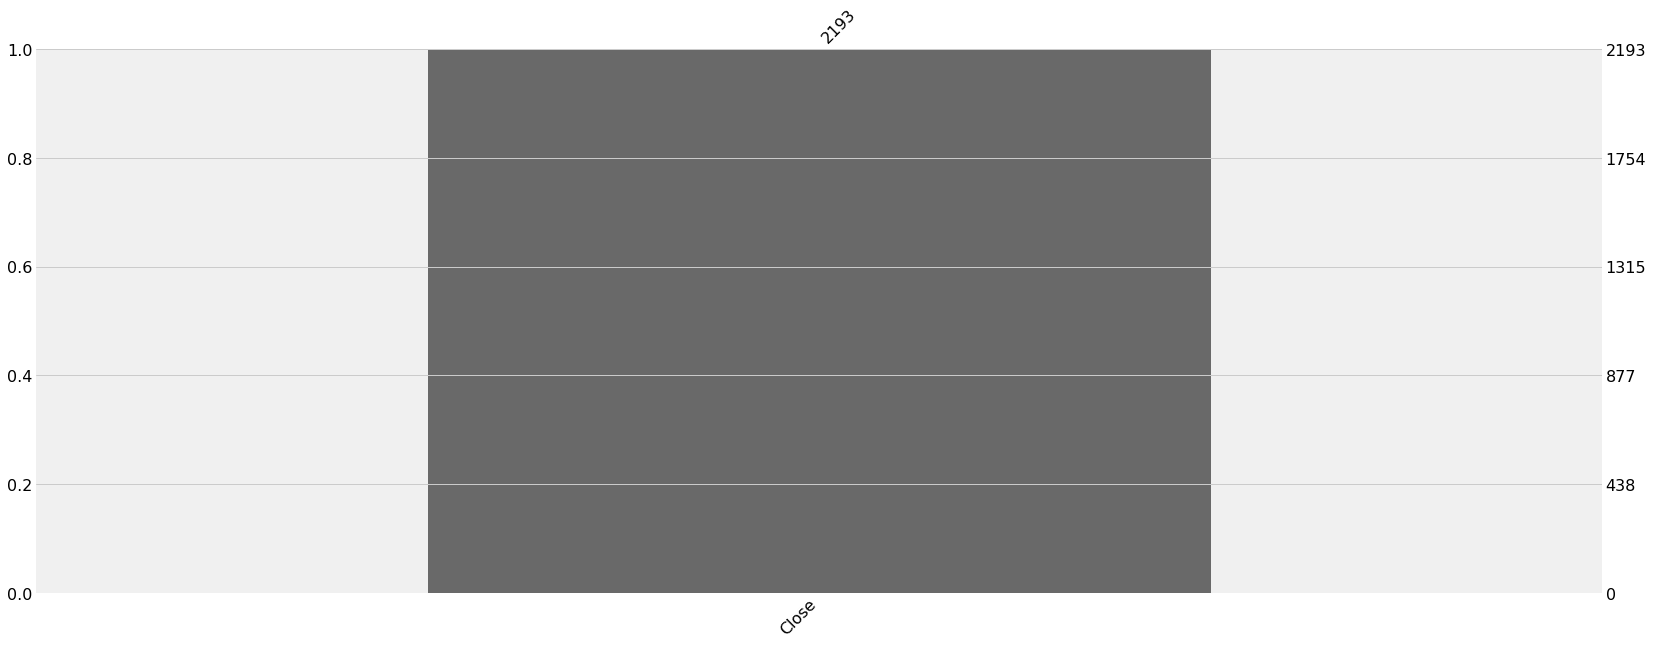

In [ ]:
## Missing data
plt.figure(figsize=(1,1))
import missingno as msno
msno.bar(train)
plt.show()

Let us graphically represent the closing prices of the stock.

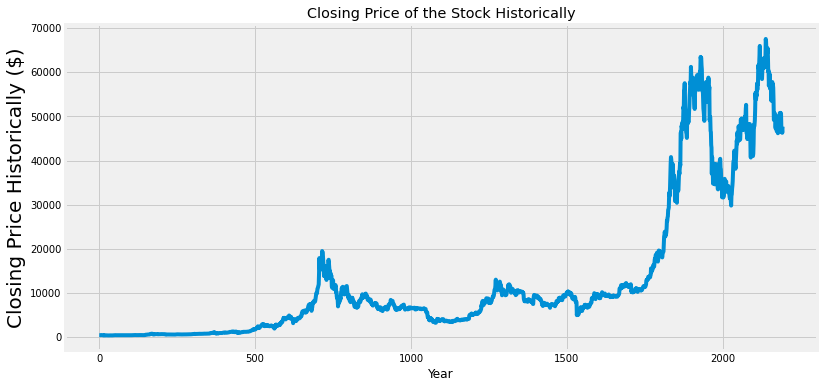

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Closing Price of the Stock Historically')
plt.plot(train_data['Close'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Closing Price Historically ($)', fontsize=20)
plt.show()

**LSTM Algorithm**

We need to create a seperate dataframe with the "close" column

In [ ]:
train = train.filter(['Close'])
dataset = train.values

In [ ]:
#Find out the number of rows that are present in this dataset in order to train our model.
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1755

Now, we need to scale the data

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00104167],
       [0.00102834],
       [0.00097734],
       ...,
       [0.69660795],
       [0.68363701],
       [0.70417743]])

**Create the training data for the model**

In [ ]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for j in range(60, len(train_data)):
    x_train.append(train_data[j-60:j,0])
    y_train.append(train_data[j,0])
    if j<=60:
        print(x_train)
        print(y_train)
        print()

[array([1.04167291e-03, 1.02833967e-03, 9.77344516e-04, 1.02317640e-03,
       1.00634649e-03, 9.63863246e-04, 1.39454654e-03, 1.32285288e-03,
       1.23923963e-03, 1.24489426e-03, 1.25139717e-03, 1.06185054e-03,
       1.01246250e-03, 9.81734442e-04, 0.00000000e+00, 3.45299922e-04,
       2.67371270e-04, 3.39823756e-04, 2.35378054e-04, 8.31799701e-04,
       6.83471611e-04, 2.70243083e-04, 3.44630095e-04, 5.74978842e-04,
       4.07648825e-04, 4.14002785e-04, 4.55950185e-04, 2.37461518e-04,
       2.25333963e-04, 2.07194845e-04, 6.60095114e-05, 1.29831574e-04,
       1.50545061e-04, 8.35982477e-05, 3.75923531e-04, 3.30612968e-04,
       1.81407083e-04, 1.82865243e-04, 1.35649677e-04, 1.74070883e-04,
       2.57698653e-04, 2.28012331e-04, 2.96596211e-04, 4.09642382e-04,
       6.38354508e-04, 5.33521901e-04, 6.42193592e-04, 7.73646802e-04,
       8.63688025e-04, 8.40058218e-04, 1.08378424e-03, 1.10809885e-03,
       1.09247417e-03, 8.39328900e-04, 9.02109231e-04, 8.95993669e-04,
     

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1695, 60, 1)

**Building the LSTM Model**

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

Lets see the summary of the model.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


**Training the Model**

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1695/1695 [==============================] - 56s 31ms/step - loss: 2.0766e-04


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

for j in range(60, len(test_data)):
    x_test.append(test_data[j-60:j, 0])

In [ ]:
x_test = np.array(x_test)
x_test

array([[0.16840883, 0.1681562 , 0.1697893 , ..., 0.16545558, 0.16930481,
        0.17189843],
       [0.1681562 , 0.1697893 , 0.16371123, ..., 0.16930481, 0.17189843,
        0.18540023],
       [0.1697893 , 0.16371123, 0.16553004, ..., 0.17189843, 0.18540023,
        0.18751626],
       ...,
       [0.90702918, 0.90234854, 0.93541273, ..., 0.74812826, 0.70271979,
        0.68569446],
       [0.90234854, 0.93541273, 0.93159806, ..., 0.70271979, 0.68569446,
        0.69660795],
       [0.93541273, 0.93159806, 0.90901234, ..., 0.68569446, 0.69660795,
        0.68363701]])

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test

array([[[0.16840883],
        [0.1681562 ],
        [0.1697893 ],
        ...,
        [0.16545558],
        [0.16930481],
        [0.17189843]],

       [[0.1681562 ],
        [0.1697893 ],
        [0.16371123],
        ...,
        [0.16930481],
        [0.17189843],
        [0.18540023]],

       [[0.1697893 ],
        [0.16371123],
        [0.16553004],
        ...,
        [0.17189843],
        [0.18540023],
        [0.18751626]],

       ...,

       [[0.90702918],
        [0.90234854],
        [0.93541273],
        ...,
        [0.74812826],
        [0.70271979],
        [0.68569446]],

       [[0.90234854],
        [0.93541273],
        [0.93159806],
        ...,
        [0.70271979],
        [0.68569446],
        [0.69660795]],

       [[0.93541273],
        [0.93159806],
        [0.90901234],
        ...,
        [0.68569446],
        [0.69660795],
        [0.68363701]]])

In [ ]:
predictions = model.predict(x_test)
predictions



array([[0.1643728 ],
       [0.16790713],
       [0.17244641],
       [0.17673478],
       [0.180642  ],
       [0.18352076],
       [0.18547499],
       [0.18797833],
       [0.18938191],
       [0.19035518],
       [0.19115168],
       [0.1922471 ],
       [0.19317633],
       [0.19339345],
       [0.19414702],
       [0.19546895],
       [0.20037265],
       [0.20630915],
       [0.21009058],
       [0.21372993],
       [0.21628535],
       [0.21772327],
       [0.21928936],
       [0.22200304],
       [0.2249226 ],
       [0.22684121],
       [0.22762495],
       [0.22950606],
       [0.23386529],
       [0.2391607 ],
       [0.24412154],
       [0.25007528],
       [0.25556698],
       [0.25921592],
       [0.26124382],
       [0.26384884],
       [0.26527578],
       [0.26189008],
       [0.2564364 ],
       [0.25217786],
       [0.25027108],
       [0.2534612 ],
       [0.25674522],
       [0.26066113],
       [0.26489863],
       [0.2667799 ],
       [0.26829576],
       [0.269

In [ ]:
predictions = scaler.inverse_transform(predictions)
predictions

array([[11410.594],
       [11648.109],
       [11953.16 ],
       [12241.349],
       [12503.924],
       [12697.384],
       [12828.713],
       [12996.943],
       [13091.268],
       [13156.674],
       [13210.201],
       [13283.815],
       [13346.263],
       [13360.854],
       [13411.495],
       [13500.332],
       [13829.873],
       [14228.821],
       [14482.942],
       [14727.516],
       [14899.246],
       [14995.878],
       [15101.123],
       [15283.489],
       [15479.69 ],
       [15608.627],
       [15661.296],
       [15787.711],
       [16080.662],
       [16436.527],
       [16769.908],
       [17170.016],
       [17539.07 ],
       [17784.29 ],
       [17920.568],
       [18095.633],
       [18191.525],
       [17964.   ],
       [17597.498],
       [17311.314],
       [17183.174],
       [17397.559],
       [17618.252],
       [17881.41 ],
       [18166.182],
       [18292.607],
       [18394.477],
       [18494.725],
       [18549.613],
       [18425.256],


In [ ]:
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

3793.439787659389

**Plot the graph**

In [ ]:
trai = train[:training_data_len]
trai

,Close
0,434.334015
1,433.437988
2,430.010986
3,433.091003
4,431.959991
...,...
1750,11322.123047
1751,11358.101563
1752,11483.359375
1753,11742.037109


In [ ]:

val = train[training_data_len:]
val

,Close
1755,12823.689453
1756,12965.891602
1757,12931.539063
1758,13108.062500
1759,13031.173828
...,...
2188,47588.855469
2189,46444.710938
2190,47178.125000
2191,46306.445313


In [ ]:
val['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Plot the graph**

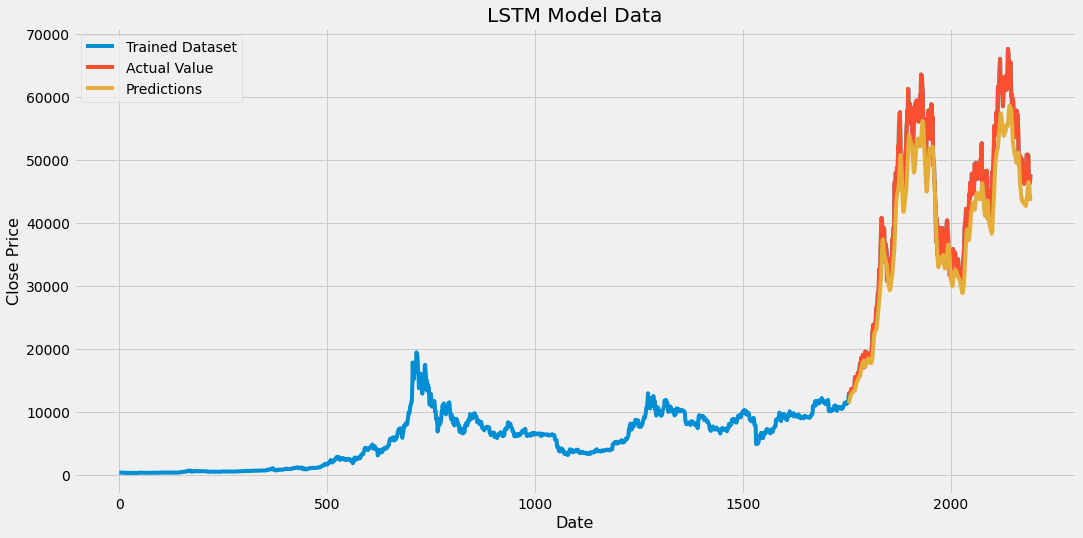

In [ ]:
plt.figure(figsize=(16,8))
plt.title('LSTM Model Data')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(train['Close'])
plt.plot(val[['Close', 'Predictions']])
plt.legend(['Trained Dataset', 'Actual Value', 'Predictions'])
plt.show()

In [ ]:
val.head(10)

,Close,Predictions
1755,12823.689453,11410.593750
1756,12965.891602,11648.109375
1757,12931.539063,11953.160156
1758,13108.062500,12241.348633
1759,13031.173828,12503.923828
1760,13075.248047,12697.383789
1761,13654.218750,12828.712891
1762,13271.285156,12996.943359
1763,13437.882813,13091.267578
1764,13546.522461,13156.673828


In [ ]:

new_train_data = pd.read_csv('/content/BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv')
new_train_data = train.filter(['Close'])
last_60_days = new_train_data[-60:].values
last_60_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
print('The predicted price of the final value of the dataset', predicted_price)

The predicted price of the final value of the dataset [[43000.37]]


In [ ]:
new_train_data.tail(1)

,Close
2192,47686.8125


In [ ]:
#check predicted values
predictions = model.predict(x_test) 
#Undo scaling
predictions = scaler.inverse_transform(predictions)

#Calculate RMSE score
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse



4741.512567361083

In [ ]:
val.describe()

,Close,Predictions
count,438.000000,438.000000
mean,42668.135802,38874.699219
std,14089.116097,12381.202148
min,12823.689453,11410.593750
25%,33812.340821,31387.040039
50%,46192.458985,41935.162109
75%,54763.419922,49395.760742
max,67566.828125,58577.867188


In [ ]:
x = val.Close.mean()
y = val.Predictions.mean()
Accuracy = x/y*100
print("The accuracy of the model is " , Accuracy)

The accuracy of the model is  109.7581117281083


**Regression Model**

In [ ]:
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [ ]:
train = pd.read_csv('/content/BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv')

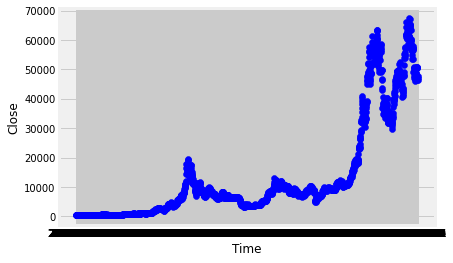

In [ ]:
plt.scatter(train.Date, train.Close,  color='blue')
plt.xlabel("Time")
plt.ylabel("Close")
plt.show()

In [ ]:
dataset.shape

(2193, 1)

In [ ]:
train['Date'] = pd.to_datetime(train.Date)

In [ ]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [ ]:
print(len(train))

2193


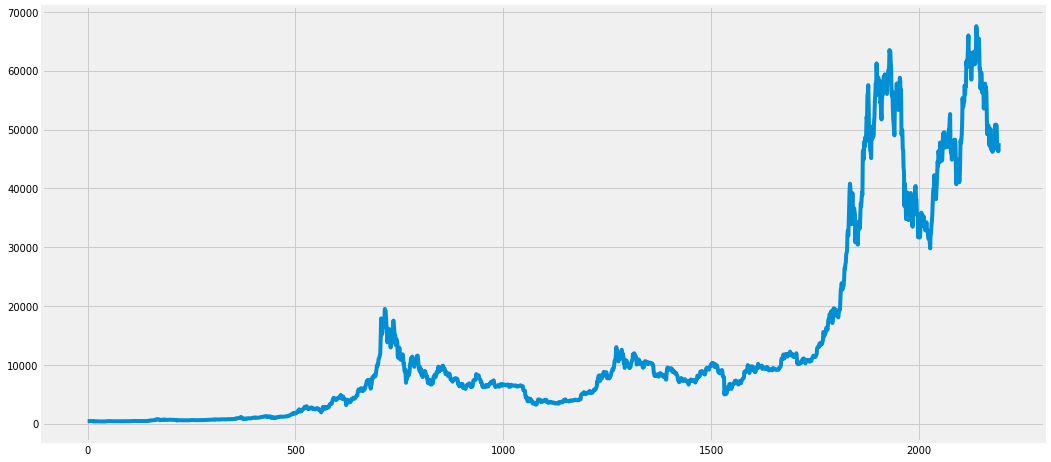

In [ ]:
train['Close'].plot(figsize=(16,8))

In [ ]:
x1 = train[['Open', 'High','Low', 'Volume']]
y1 = train['Close']

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state = 0)

In [ ]:
x1_train.shape

(1644, 4)

In [ ]:
x1_test.shape

(549, 4)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()

In [ ]:
regression.fit(x1_train, y1_train)

LinearRegression()

In [ ]:
print(regression.coef_)

[-5.41125561e-01  9.00347825e-01  6.35449625e-01  7.45814299e-10]


In [ ]:

print(regression.intercept_)

1.97166935493442


In [ ]:
predicted=regression.predict(x1_test)
predicted

array([ 1591.8573378 ,  4304.43287468, 36392.91202738, 51818.42347276,
         889.4324666 , 10910.15069597, 38350.72273721,  7253.68612911,
        2710.06108216,  9451.89204268, 57680.72108193,   573.28614658,
        7339.39418274,   668.41157924,   644.77483354,  9692.59313429,
         457.77368113,  6452.9470288 ,  6497.10259327,  6476.42217832,
        6642.81656766, 39546.23434527,  8196.49739019, 10027.02967577,
       10059.0367033 ,  6333.23237914,  9152.48122774, 10334.62505164,
       30667.35387532,  1026.67272715,  9265.49931496,  2804.52739984,
       11807.40582812, 10296.03544947,   578.20526538,   376.55471182,
       10634.88384221, 11436.82545555, 48553.18437432,  6456.54584415,
       55123.14103342,  7060.29401559,   660.47384243, 63476.89240941,
       55558.07057171, 11808.23508283, 10156.95002072,  9117.73915763,
        6898.69925921, 10905.88833975,   790.89836923,  1209.99310255,
         621.59567247,  6335.85398361,  1220.87360273, 63019.02101381,
      

In [ ]:
print(x1_test)

              Open          High           Low       Volume
489    1490.719971   1608.910034   1490.719971    933548992
1063   4269.004395   4413.020508   4145.765137   6503347767
1986  33416.976563  37537.371094  32475.865234  53972919008
1888  48415.816406  52535.136719  48274.320313  53220811975
385     898.171997    899.398010    887.007996     86728400
...            ...           ...           ...          ...
1027   6478.890137   6521.990234   6468.859863   3424670000
1654   9241.054688   9319.418945   9197.450195  14452361907
1967  40596.949219  42172.171875  33616.453125  82051616861
654    5687.569824   5776.229980   5544.209961   2008070016
1318  11349.740234  11523.579102  11248.294922  15774371518

[549 rows x 4 columns]


In [ ]:
predicted.shape

(549,)

In [ ]:
dframe = pd.DataFrame(y1_test,predicted)
dfr=pd.DataFrame({'Actual_Price':y1_test, 'Predicted_Price':predicted})
print(dfr)

      Actual_Price  Predicted_Price
489    1537.670044      1591.857338
1063   4278.846680      4304.432875
1986  37345.121094     36392.912027
1888  50538.242188     51818.423473
385     895.026001       889.432467
...            ...              ...
1027   6495.839844      6481.327067
1654   9276.500000      9247.414391
1967  37304.691406     37426.305735
654    5725.589844      5649.462140
1318  11523.579102     11395.056030

[549 rows x 2 columns]


In [ ]:
dfr.head(10)

,Actual_Price,Predicted_Price
489,1537.670044,1591.857338
1063,4278.846680,4304.432875
1986,37345.121094,36392.912027
1888,50538.242188,51818.423473
385,895.026001,889.432467
1296,10767.139648,10910.150696
1990,39097.859375,38350.722737
1442,7269.684570,7253.686129
579,2710.669922,2710.061082
1490,9508.993164,9451.892043


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
regression.score(x1_test, y1_test)

0.9996758350494236

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, predicted)))

Mean Absolute Error: 136.35648357985554
Mean Squared Error: 88775.8476924798
Root Mean Squared Error: 297.9527608405061


In [ ]:
dfr.describe()


,Actual_Price,Predicted_Price
count,549.000000,549.000000
mean,12972.274385,12973.779366
std,16563.811476,16549.243206
min,364.330994,373.481108
25%,2273.429932,2319.766764
50%,7217.427246,7313.818570
75%,11489.700195,11420.953285
max,66971.828125,67364.270524


In [ ]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  99.98839982420698


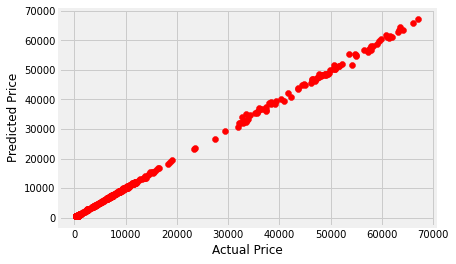

In [ ]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.show()